!mkdir -p ~/aiffel/human_segmentation/models   
!mkdir -p ~/aiffel/human_segmentation/images  
!ln -s ~/data/* ~/aiffel/human_segmentation/images  

In [2]:
# os: Operating System의 줄임말로, 운영체제에서 제공되는 여러 기능을 파이썬에서 사용할 수 있도록 함 (Ex. 디렉토리 경로 이동, 시스템 환경 변수 가져오기 등)
# urllib: URL 작업을 위한 여러 모듈을 모은 패키지. (Ex. urllib.request, urllib.parse, ...)
# cv2: OpenCV 라이브러리로, 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리
# numpy(NumPy): 행렬이나 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리. 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공
# pixellib: 이미지 및 비디오 segmentation을 수행하기 위한 라이브러리. 
# pixellib.semantic: segmentation 기법 중, semantic segmentation을 쉽게 사용할 수 있도록 만든 라이브러리
# matplotlib: 파이썬 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리로, 데이터 시각화 도구
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

(500, 892, 3)


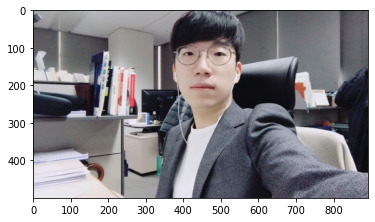

In [3]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
# 저장할 파일 이름을 결정합니다
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환합니다. model_dir 에 "/aiffel/human_segmentation/models" 저장
# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장
# 1
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7b6b542ed8e0>)

In [6]:
#PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model = semantic_segmentation() 
# pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출
model.load_pascalvoc_model(model_file) 

In [7]:
# segmentAsPascalvoc()함수를 호출하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 
# 분할은 pacalvoc 데이터로 학습된 모델을 이용
segvalues, output = model.segmentAsPascalvoc(img_path) 

In [8]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

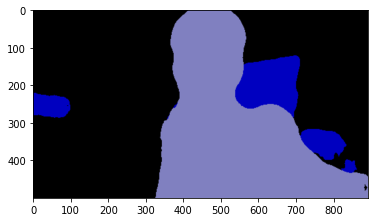

In [9]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [10]:
# segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력
segvalues 

{'class_ids': array([ 0,  9, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]])}

In [11]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person


In [12]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!

#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [13]:
#컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)
colormap[15] 

array([192, 128, 128])

In [14]:
# 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서
seg_color = (128,128,192)

(500, 892)


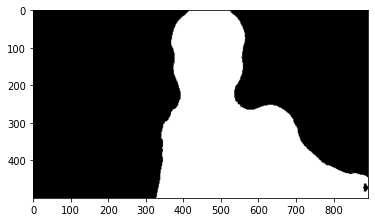

In [15]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

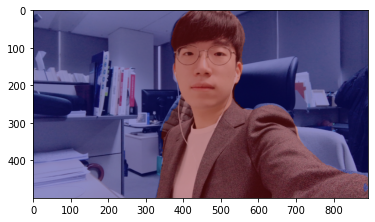

In [16]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

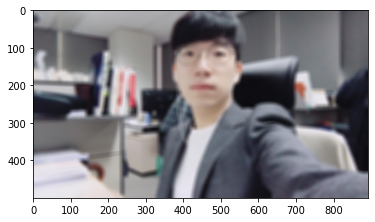

In [17]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (13,13))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

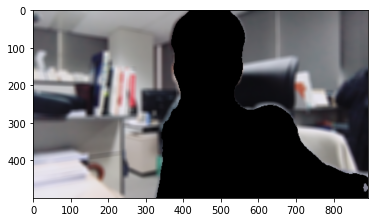

In [18]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

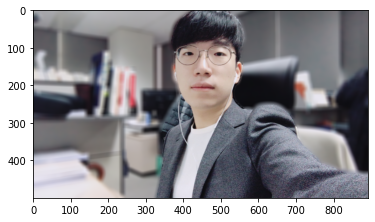

In [19]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

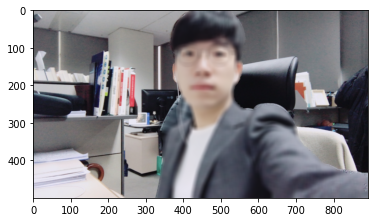

In [21]:
# Q. 이번에는 사람 부분을 블러로, 배경 부분을 원본으로 출력해볼까요?
# 힌트 : img_mask_color 옵션을 적절히 조정해주고, img_orig, img_orig_blur 를 활용하세요.
img_concat = np.where(img_mask_color==255, img_orig_blur, img_orig)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 4-1. 프로젝트: 인물 모드 문제점 찾기

In [6]:
# importlib: 사용자가 파이썬의 import 시스템과 상호작용하기 위한 API를 제공하는 내장 라이브러리
# 사용자는 import 함수의 구현 내용과, 실행에 필요한 하위 함수들을 이용해 필요에 맞는 임포터를 직접 구현하거나 임포트 관련 기능들을 자유롭게 사용할 수 있음
# importlib.metadata: 설치된 패키지 메타 데이터에 대한 접근을 제공하는 라이브러리.
# 해당 코드 블럭에서는 importlib.metadata 안에 있는 version() 함수를 이용하여 pixellib 라이브러리의 버전을 확인

from importlib.metadata import version
import cv2
import pixellib
import os
import urllib
import numpy as np
from pixellib.semantic import semantic_segmentation
import matplotlib.pyplot as plt

print(f'The version of cv2 : {cv2.__version__}')
print('The version of pixellib : {}'.format(version('pixellib')))

The version of cv2 : 4.5.3
The version of pixellib : 0.7.1


## Step 1. 인물모드 직접 해보기

In [7]:
# 모델 불러오기
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [8]:
#pascalvoc 데이터의 라벨
LABEL_NAMES = [  
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',  
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',  
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'  
]

labels = {x:i for i, x in enumerate(LABEL_NAMES)}

In [9]:
#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

In [10]:
def bgr2rgb(bgr):
    rgb = (bgr[2], bgr[1], bgr[0])
    return rgb

In [11]:
# Image segmentation이 제대로 이루어졌는지 확인하기 위한 함수

def get_mask(img_path, focus_list):
    img_orig = cv2.imread(img_path)
    img_show = img_orig.copy()
    img_orig_blur = cv2.blur(img_orig, (21,21))
    segvalues, output = model.segmentAsPascalvoc(img_path)
    
    # seg_color는 focus_list에 있는 요소들의 colormap 값 리스트
    seg_color = [colormap[labels[x]] for x in focus_list]
    seg_color = [bgr2rgb(x) for x in seg_color]
    
    # focus 하고자 하는 모든 대상(seg_color)의 위치 식별
    seg_map = np.zeros(output.shape[:2], dtype=bool)
    for obj in seg_color:
        seg_map |= np.all(output==obj, axis=-1) 
    
    # True과 False인 값을 각각 255과 0으로 바꿔줍니다
    img_mask = seg_map.astype(np.uint8) * 255
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    
    plt.imshow(img_mask_color)
    plt.show()
    
    return seg_map

In [46]:
# 인물모드 출력 함수
def get_portrait_mode(img_path, focus_list):
    img_orig = cv2.imread(img_path)
    img_show = img_orig.copy()
    img_orig_blur = cv2.blur(img_orig, (21,21))
    segvalues, output = model.segmentAsPascalvoc(img_path)
    
    # seg_color는 focus_list에 있는 요소들의 colormap 값 리스트
    seg_color = [colormap[labels[x]] for x in focus_list]
    seg_color = [bgr2rgb(x) for x in seg_color]
    
    # focus 하고자 하는 모든 대상(seg_color)의 위치 식별
    seg_map = np.zeros(output.shape[:2], dtype=bool)
    for obj in seg_color:
        seg_map |= np.all(output==obj, axis=-1) 
    
    # True과 False인 값을 각각 255과 0으로 바꿔줍니다
    img_mask = seg_map.astype(np.uint8) * 255
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    
    # 배경은 255 object는 0으로 변경
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
    
    # 255와 0을 적당한 색상으로 변경
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

    img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
    
    plt.figure(figsize=(15,10))
    
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original Mode')
    
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Portrait Mode')

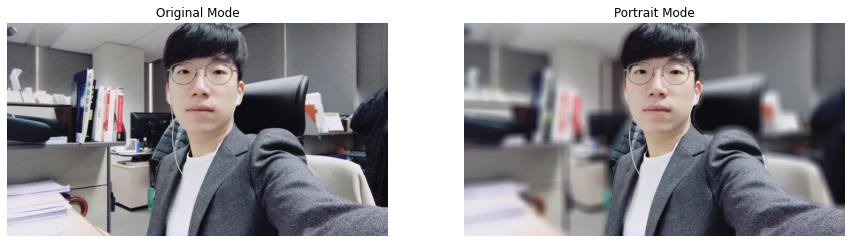

In [59]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.png'  
focus_list = ['person']
get_portrait_mode(img_path, focus_list)

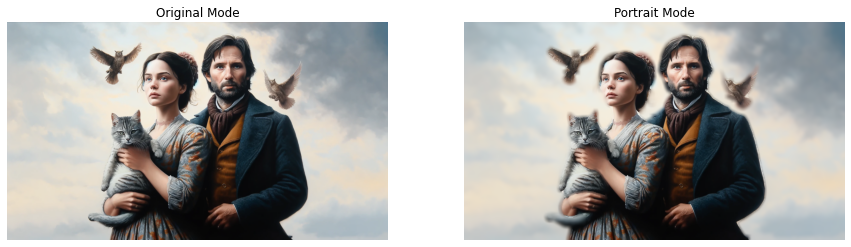

In [60]:
# Dall-e로 생성한 그림
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/test1.webp'  
focus_list = ['person', 'cat', 'bird']
get_portrait_mode(img_path, focus_list)

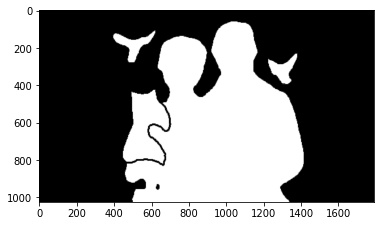

In [61]:
# 새를 제대로 식별하지 못한 것 같아서 확인해봄.
# 경계를 뚜렷하게 식별하지 못하고 새의 머리를 식별하지 못하는 문제로 전반적으로 흐리게 보임
get_mask(img_path, focus_list)

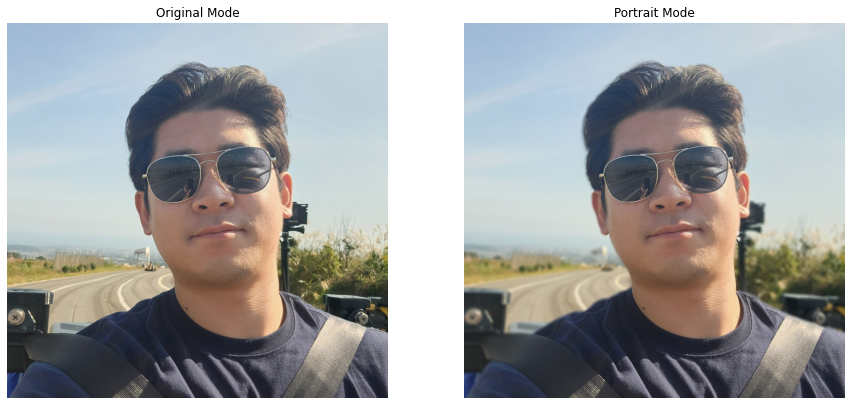

In [62]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/me_on_the_cart.jpeg'  
focus_list = ['person']
get_portrait_mode(img_path, focus_list)

### 사람과 고양이 포커싱

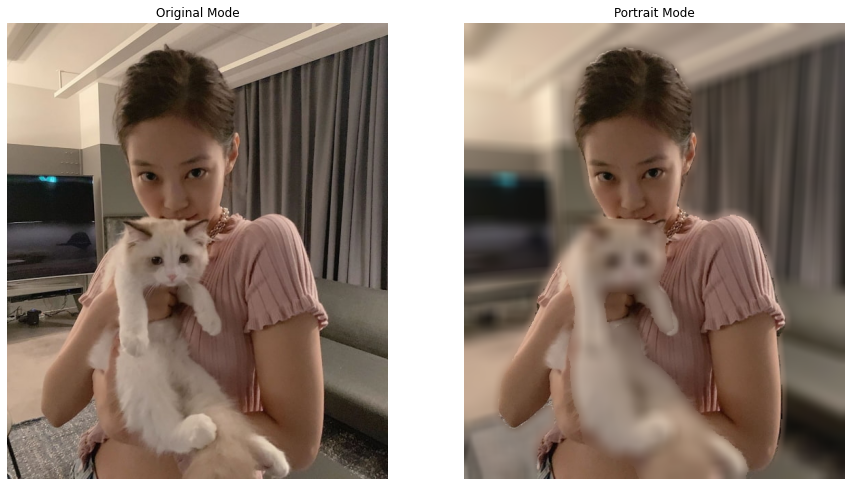

In [63]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/jenny_with_a_cat.jpg'  
focus_list = ['person']
get_portrait_mode(img_path, focus_list)

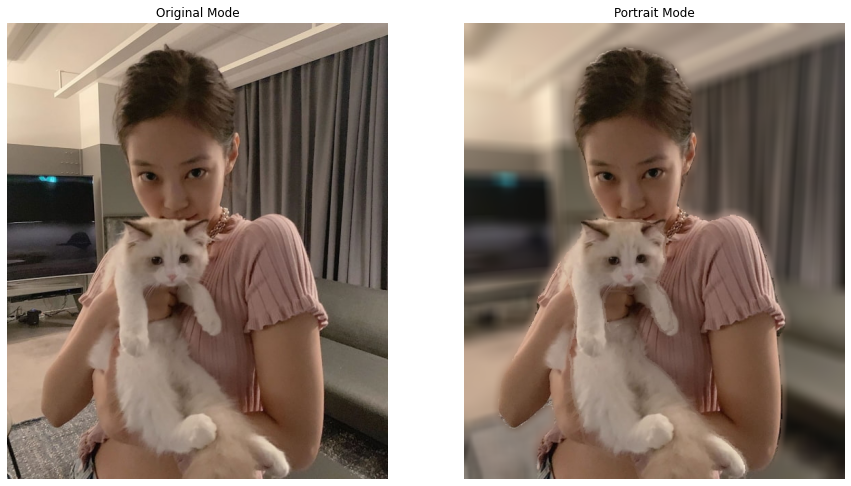

In [64]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/jenny_with_a_cat.jpg'  
focus_list = ['person', 'cat']
get_portrait_mode(img_path, focus_list)

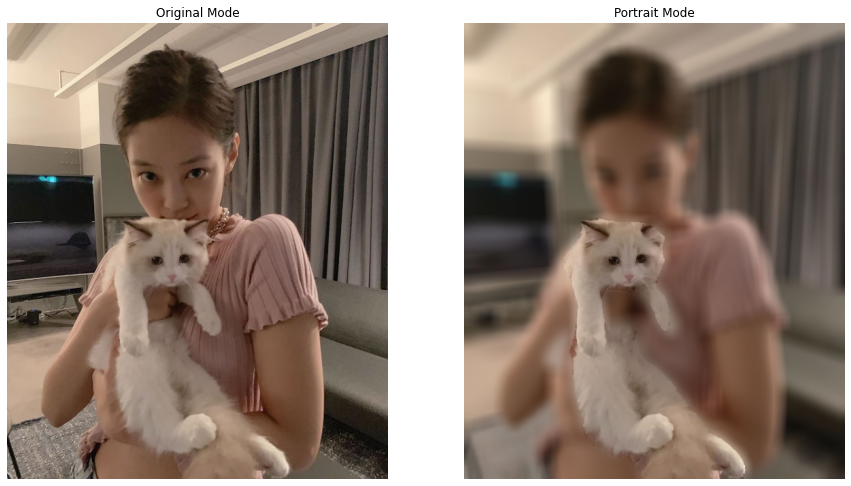

In [79]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/jenny_with_a_cat.jpg'  
focus_list = ['cat']
get_portrait_mode(img_path, focus_list)

### 배경사진 변경하기

In [47]:
def background_compositing(img_path, bg_img_path, focus_list):
    img_orig = cv2.imread(img_path)
    img_show = img_orig.copy()
    
    img_bg = cv2.imread(bg_img_path)
    img_bg = cv2.resize(img_bg, (img_orig.shape[1], img_orig.shape[0]))
    
    segvalues, output = model.segmentAsPascalvoc(img_path)
    
    # seg_color는 focus_list에 있는 요소들의 colormap 값 리스트
    seg_color = [colormap[labels[x]] for x in focus_list]
    seg_color = [bgr2rgb(x) for x in seg_color]
    
    # 남기고자 하는 모든 대상(seg_color)의 위치 식별
    seg_map = np.zeros(output.shape[:2], dtype=bool)
    for obj in seg_color:
        seg_map |= np.all(output==obj, axis=-1) 
    
    # np.where의 3가지 인수는 차원이 같아야 함. 그냥 같은 값으로 3차원 뻥튀기 해줘도 됨
    img_mask = seg_map.astype(np.uint8) * 255
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    
    img_concat = np.where(img_mask_color==255, img_show, img_bg)
    
    plt.figure(figsize=(15,10))
    
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original Image')
    
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Backgound Compositing Image')
    
    return cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB)

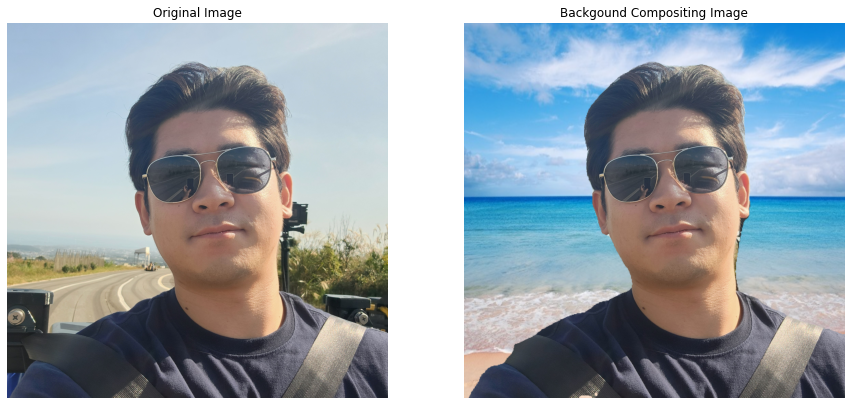

In [48]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/me_on_the_cart.jpeg' 
bg_img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/beach.jpg' 
focus_list = ['person']
cart_on_the_beach1 = background_compositing(img_path, bg_img_path, focus_list)

## Step 2. 사진에서 문제점 찾기

![문제찾기 1](human_segmentation/images/problem3.png) 

![문제찾기 2](human_segmentation/images/problem2.png)

![문제찾기 3](human_segmentation/images/problem1.png) 

## Step3. 해결 방법 제안하기

세그멘테이션의 부정확성을 해결하기 위한 방법으로는  
데이터 증강, 하이퍼 파라미터 튜닝, 후처리, 다중 스케일 처리, Fine-Tuning, 앙상블 기법 등이 있다.  
그 중 CRF 후처리를 적용하여 성능을 향상시켜보는 실습을 진행해본다.

### CRF 후처리

**CRF(Conditional Random Field, 조건부 확률장)**  
  
CRF(Conditional Random Fields)는 세그멘테이션 경계를 더욱 정밀하게 다듬기 위해 사용되는 후처리 기법이다.  
이 기법은 원본 이미지의 시각적 특성과 모델의 예측을 결합하여 경계가 더 선명한 결과를 얻을 수 있게 한다.  

ref. https://arxiv.org/abs/1210.5644

!conda install -y -c conda-forge pydensecrf

In [36]:
# Image segmentation이 제대로 이루어졌는지 확인하기 위한 함수
# get_mask는 하나의 matrix에 focus_list에서 식별한 모든 요소를 집어넣었고,
# get_multiple_mask는 각 요소별로 matrix를 만들어서 (num_classes, (사진크기)) 형태의 mask를 반환한다.

def get_multiple_mask(img_path, focus_list):
    img_orig = cv2.imread(img_path)
    img_show = img_orig.copy()
    img_orig_blur = cv2.blur(img_orig, (21,21))
    segvalues, output = model.segmentAsPascalvoc(img_path)
    
    # seg_color는 focus_list에 있는 요소들의 colormap 값 리스트
    seg_color = [colormap[labels[x]] for x in focus_list]
    seg_color = [bgr2rgb(x) for x in seg_color]
    
    result = []
    
    # focus 하고자 하는 모든 대상(seg_color)의 위치 식별
    # 각 object 별로 하나의 mask matrix를 출력
    seg_map = np.zeros(output.shape[:2], dtype=bool)
    for obj in seg_color:
        result.append(np.all(output==obj, axis=-1))
        seg_map |= np.all(output==obj, axis=-1) 
        
    # True과 False인 값을 각각 255과 0으로 바꿔줍니다
    img_mask = seg_map.astype(np.uint8) * 255
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    
    plt.imshow(img_mask_color)
    plt.show()
    
    # result.shape = (num_classes, (사진크기))
    return result

In [52]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import pydensecrf.densecrf as dcrf
from pydensecrf.utils import unary_from_softmax, create_pairwise_bilateral, create_pairwise_gaussian

def apply_crf(image, prob_map):
    # 이미지의 height, width
    h, w = image.shape[:2]
    
    # DenseCRF 객체 생성
    d = dcrf.DenseCRF2D(w, h, prob_map.shape[0])
    
    # Unary potential 생성
    U = unary_from_softmax(prob_map)
    d.setUnaryEnergy(U)
    
    # Pairwise Gaussian potential 추가
    sdims_gaussian = (5, 5)  # 성능 관련 파라미터 1
    pairwise_gaussian = create_pairwise_gaussian(sdims=sdims_gaussian, shape=(h, w))
    d.addPairwiseEnergy(pairwise_gaussian, compat=5)  # 성능 관련 파라미터 2
    
    # Pairwise Bilateral potential 추가
    sdims_bilateral = (90, 90)  # 성능 관련 파라미터 3
    schan_bilateral = (10, 10, 10)  # 성능 관련 파라미터 4
    pairwise_bilateral = create_pairwise_bilateral(sdims=sdims_bilateral, schan=schan_bilateral, img=image, chdim=2)
    d.addPairwiseEnergy(pairwise_bilateral, compat=15)  # 성능 관련 파라미터 5
    
    # Inference 수행
    Q = d.inference(5)
    
    # 결과 맵으로 변환
    map = np.argmax(Q, axis=0).reshape((h, w))
    
    return map

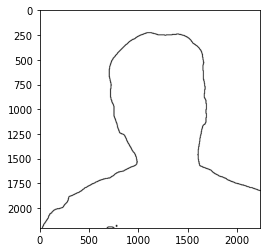

In [43]:
# 예제 이미지 및 확률 맵 로드
image_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/me_on_the_cart.jpeg' 
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 예제 확률 맵 (여기서는 랜덤하게 생성된 값을 사용)
height, width = image.shape[:2]

focus_list = ['person', 'car', 'background']
num_classes = len(focus_list)

prob_map = np.array(get_multiple_mask(image_path, focus_list))

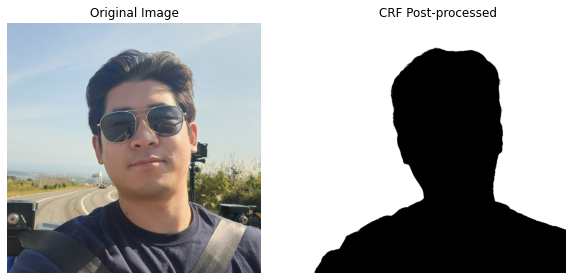

In [44]:
# CRF 후처리 적용
result = apply_crf(image, prob_map)

# 결과 출력
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.title('CRF Post-processed')
plt.axis('off')

plt.show()

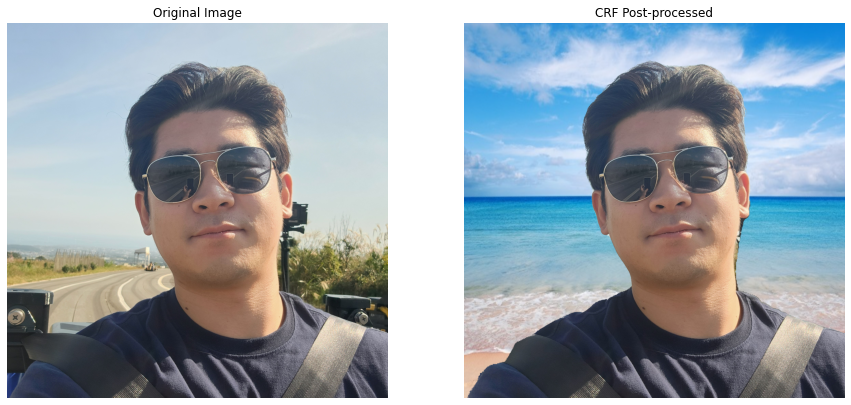

In [49]:
bg_img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/beach.jpg' 
img_bg = cv2.imread(bg_img_path)
img_bg = cv2.resize(img_bg, (image.shape[1], image.shape[0]))
img_bg = cv2.cvtColor(img_bg, cv2.COLOR_BGR2RGB)

img_mask = result.astype(np.uint8) * 255
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2RGB)

cart_on_the_beach2 = np.where(img_mask_color==0, image, img_bg)

# 결과 출력
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cart_on_the_beach2)
plt.title('CRF Post-processed')
plt.axis('off')

plt.show()

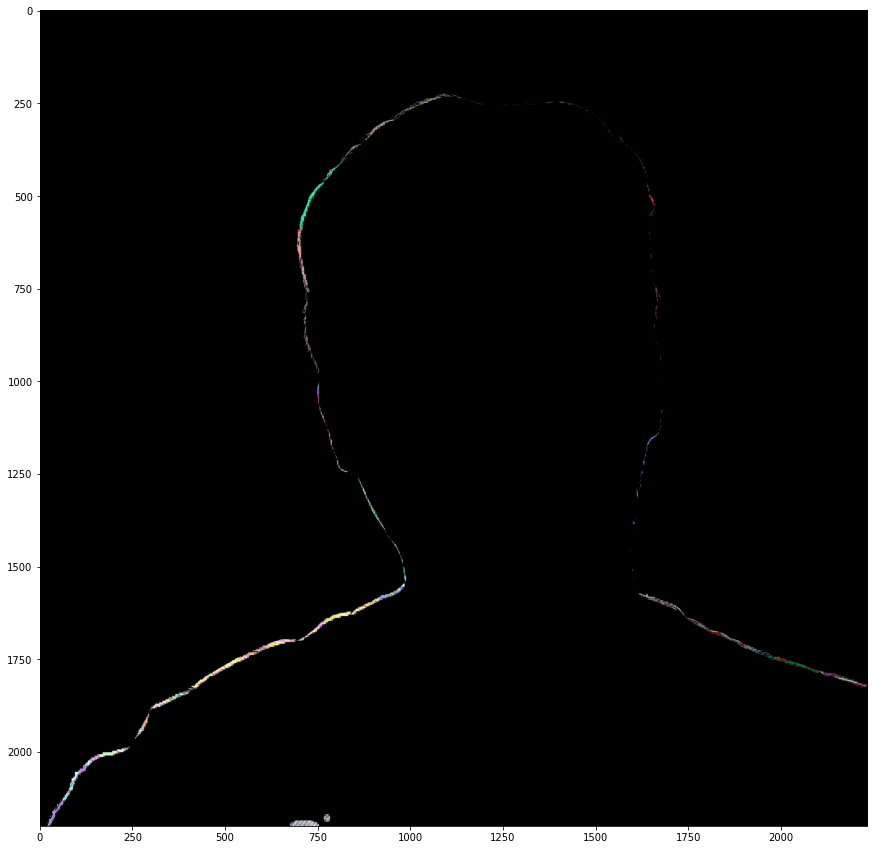

In [51]:
bits_diff = np.bitwise_xor(cart_on_the_beach1, cart_on_the_beach2)

plt.figure(figsize=(15,15))
plt.imshow(bits_diff)
plt.show()

기본 모델을 이용했을 때와 CRF 후처리를 적용하였을 때, 경계선 부분에 어느 정도 차이가 있었다.
하지만 문제로 인식했던 목 부분 경계는 여전히 제대로 처리하지 못했다.

## 회고

* 배운 점
  - Image segmentation 관련 실습을 처음으로 해보았다.
  - pixellib, pydensecrf 등의 라이브러리를 활용해보았다.
* 아쉬운 점
  - 비교적 쉬워보이는 목 부분 경계를 제대로 찾지 못하였고, dense CRF를 적용하였음에도 개선되지 않았다.
  - dense CRF의 작동 원리에 대해 모른 채 라이브러리만 가져다 사용했다. 소개 논문이나 자료를 보고 공부해야겠다.
* 느낀 점
  - 데이터셋을 구해서 모델을 추가적으로 학습시키는 방법으로 발전시켜볼 수 있을 것 같다.
  - 어제 실습에서 아쉬웠던 부분인 '함수로 구현하기'를 이번 실습에 적용해서 대부분 함수로 구현을 하였더니 훨씬 편하게 실습이 가능했다.
* 어려웠던 점
  - Image segmentation이 잘 되는 부분과 제대로 되지 않는 부분의 차이를 모르겠고, 차이를 비교해서 이유를 알아낼 수 없어서 조금 막막했다.